In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# I/ Data PreProcessing

In [4]:
sales=pd.read_csv('/workspaces/codespaces-jupyter/data/data_raw.csv')
sales

,week,sku,weekly_sales,feat_main_page,color,price,vendor,functionality
0,2016-10-31,1,135.0,True,black,10.16,6,6
1,2016-11-07,1,102.0,True,black,9.86,6,6
2,2016-11-14,1,110.0,True,black,10.24,6,6
3,2016-11-21,1,127.0,True,black,8.27,6,6
4,2016-11-28,1,84.0,True,black,8.83,6,6
...,...,...,...,...,...,...,...,...
4395,2018-08-27,44,20.0,False,black,53.99,6,9
4396,2018-09-03,44,14.0,False,NaN,52.99,6,9
4397,2018-09-10,44,22.0,True,black,44.99,6,9
4398,2018-09-17,44,28.0,True,NaN,42.99,6,9


### 1) Data Exploration

In [5]:
#types
sales.dtypes

week               object
sku                 int64
weekly_sales      float64
feat_main_page       bool
color              object
price             float64
vendor              int64
functionality       int64
dtype: object

In [6]:
#description
sales.describe()

,sku,weekly_sales,price,vendor,functionality
count,4400.000000,4400.000000,4400.000000,4400.000000,4400.000000
mean,22.500000,83.054773,44.432709,6.909091,5.818182
std,12.699868,288.000205,42.500295,2.503175,3.084568
min,1.000000,0.000000,2.390000,1.000000,1.000000
25%,11.750000,11.000000,15.680000,6.000000,4.000000
50%,22.500000,25.000000,27.550000,6.500000,6.000000
75%,33.250000,70.000000,54.990000,9.000000,8.250000
max,44.000000,7512.000000,227.720000,10.000000,12.000000


In [7]:
#boolean, object
sales.describe(include = ['boolean','object'])

,week,feat_main_page,color
count,4400,4400,4390
unique,100,2,10
top,2016-10-31,False,black
freq,44,2825,1691


In [8]:
avg = sales.groupby("week")["weekly_sales","price"].mean().reset_index()
avg

/tmp/ipykernel_2017/2596824758.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  avg = sales.groupby("week")["weekly_sales","price"].mean().reset_index()


,week,weekly_sales,price
0,2016-10-31,62.659091,42.964773
1,2016-11-07,61.227273,40.994318
2,2016-11-14,63.431818,41.340227
3,2016-11-21,58.431818,40.385000
4,2016-11-28,63.090909,40.060000
...,...,...,...
95,2018-08-27,97.409091,48.551591
96,2018-09-03,60.250000,47.006136
97,2018-09-10,125.340909,45.054091
98,2018-09-17,194.363636,43.186364


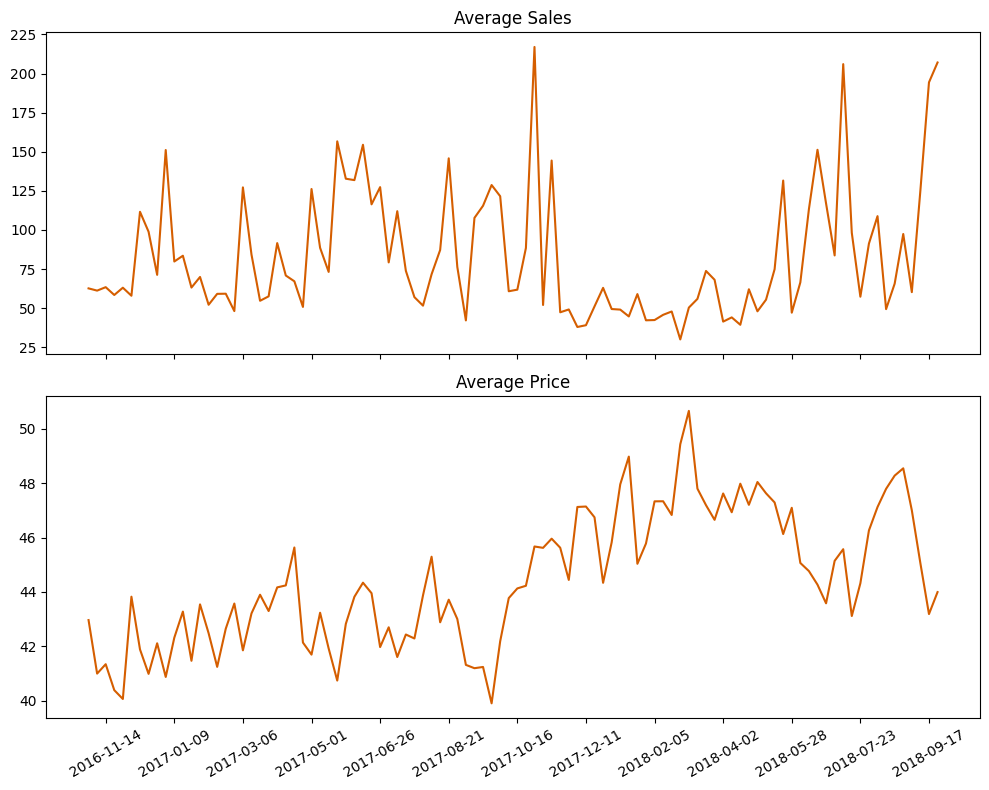

In [9]:
# Simple data to display in various forms
x = avg["week"]
y = avg["weekly_sales"]
z= avg["price"]

plt.rcParams["figure.figsize"] = (10,8)
f, axarr = plt.subplots(2, sharex=True)

color=sns.color_palette(palette='colorblind')[3]
axarr[0].plot(x, y,color=color)
plt.xticks(rotation=30)
axarr[0].set_title('Average Sales')
axarr[0].set(xticks=avg.week[2::8])

axarr[1].plot(x, z,color=color)
plt.xticks(rotation=30)
axarr[1].set_title('Average Price')
axarr[1].set(xticks=avg.week[2::8])
plt.tight_layout()
plt.show()


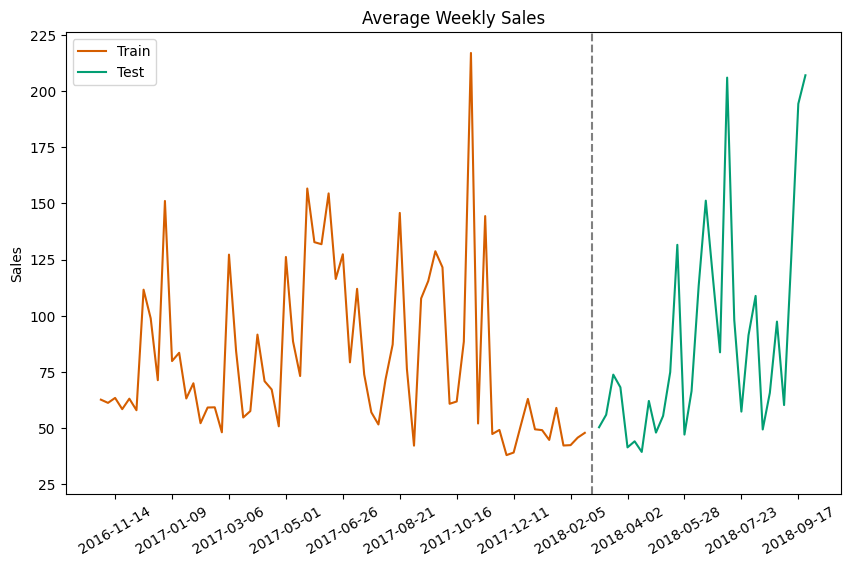

In [10]:
plt.figure(figsize=(10,6))

plt.plot(avg.iloc[:69]["week"],avg.iloc[:69]["weekly_sales"],color=sns.color_palette(palette='colorblind')[3],label="Train")
plt.plot(avg.iloc[69]["week"],avg.iloc[69]["weekly_sales"],color=sns.color_palette(palette='colorblind')[1])

plt.plot(avg.iloc[70:]["week"],avg.iloc[70:]["weekly_sales"],color=sns.color_palette(palette='colorblind')[2],label="Test")
plt.title('Average Weekly Sales')
plt.ylabel("Sales")
plt.axvline(x=avg.iloc[69]["week"],color='gray',linestyle='--')
plt.legend()

locs, labels=plt.xticks()
x_ticks = []
plt.xticks(locs[2::8],avg.week[2::8], rotation=30)

plt.show()

## 2) Missing Data

In [11]:
# features with missing data
sales.isna().any()

week              False
sku               False
weekly_sales      False
feat_main_page    False
color              True
price             False
vendor            False
functionality     False
dtype: bool

In [12]:
sales.dropna(inplace= False)

,week,sku,weekly_sales,feat_main_page,color,price,vendor,functionality
0,2016-10-31,1,135.0,True,black,10.16,6,6
1,2016-11-07,1,102.0,True,black,9.86,6,6
2,2016-11-14,1,110.0,True,black,10.24,6,6
3,2016-11-21,1,127.0,True,black,8.27,6,6
4,2016-11-28,1,84.0,True,black,8.83,6,6
...,...,...,...,...,...,...,...,...
4393,2018-08-13,44,52.0,True,black,43.99,6,9
4394,2018-08-20,44,29.0,True,black,42.38,6,9
4395,2018-08-27,44,20.0,False,black,53.99,6,9
4397,2018-09-10,44,22.0,True,black,44.99,6,9


In [13]:
sales[sales['color'].isnull()]

,week,sku,weekly_sales,feat_main_page,color,price,vendor,functionality
802,2016-11-14,9,54.0,True,NaN,139.44,9,11
803,2016-11-21,9,71.0,True,NaN,141.16,9,11
4133,2017-06-19,42,4.0,False,NaN,27.33,10,9
4196,2018-09-03,42,8.0,False,NaN,42.99,10,9
4197,2018-09-10,42,14.0,True,NaN,42.99,10,9
4200,2016-10-31,43,5.0,True,NaN,109.99,9,11
4314,2017-02-06,44,5.0,False,NaN,53.99,6,9
4391,2018-07-30,44,34.0,True,NaN,41.99,6,9
4396,2018-09-03,44,14.0,False,NaN,52.99,6,9
4398,2018-09-17,44,28.0,True,NaN,42.99,6,9


In [14]:
sales[sales.sku ==44]["color"].value_counts(dropna=False)

black    96
NaN       4
Name: color, dtype: int64

In [16]:
sales[sales.sku ==]["color"].value_counts(dropna=False)

SyntaxError: invalid syntax (590531841.py, line 1)

In [ ]:
sales[sales.sku ==]["color"].value_counts(dropna=False)

In [ ]:
sales[sales.sku ==]["color"].value_counts(dropna=False)

For one item (SKU 44), we do manual imputation:

In [ ]:
# Manual imputation
# sales.at[4391, 'color']= "black" 
# sales.at[3, 'color']= "black" 
# sales.at[8, 'color']= "black" 
# sales.at[85, 'color']= "black" 

For the other item, we introduce sklearn imputer:

In [18]:
# Using sklearn imputer
import numpy as np 
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values= , strategy=)

SyntaxError: invalid syntax (4229969718.py, line 4)

SKU 43:

In [ ]:
missing_idx_43 = sales[(sales.color.isna()) & (sales.sku==43)].index.values
missing_idx_43

In [ ]:
imputer.fit(sales[sales.sku==43][["sku","color"]])
for i in missing_idx_43:
  sales.at[i, 'color']= imputer.transform(sales[ (sales.sku ==43) & (sales.color.isna())][["sku","color"]] )[0,1]

SKUs 44,42 and 9:

In [ ]:
sales[sales['color'].isnull()]

## 3)Outliers

In [ ]:
def check_outliers(df,features,k=5):
  data = df.copy()
  for f in features:
    data['outlier_'+f] = #outlier test
  return(data)

In [ ]:
df = check_outliers(sales,['price','weekly_sales'],5)

In [ ]:
df[df.outlier_price]

In [ ]:
df[df.outlier_weekly_sales]

## 4) Accounting for Time effects

In [ ]:
sales.head()

In [ ]:
sales['trend'] = pd.DatetimeIndex(sales['week']).
sales['month'] = pd.DatetimeIndex(sales['week']). #We consider that a week belongs to the month of the Monday 
sales.head()

In [ ]:
sales.loc[0]

In [ ]:
sales = pd.get_dummies(data=sales, columns=['month'], drop_first = True)

In [ ]:
sales.loc[0]

In [ ]:
sales

## 5) Prices

In [ ]:
## Lag prices
sales["price-1"] = sales.groupby(['sku'])[].
sales["price-2"] = sales.groupby(['sku'])[].
sales.dropna(subset=['price-1',"price-2"],inplace=True)
sales.head()

In [ ]:
sales

In [ ]:
## Put lag-prices next to the price column ##
#price
col = sales.pop("price")
sales.insert(3, col.name, col)
pos_price=sales.columns.get_loc('price')
#p-1
col = sales.pop("price-1")
sales.insert(pos_price+1, col.name, col)
#p-2
col = sales.pop("price-2")
sales.insert(pos_price+2, col.name, col)
#plot
sales.head()

## 6) Other features

In [ ]:
sales['feat_main_page'] = sales.feat_main_page.astype()

In [ ]:
sales = pd.get_dummies(data=sales, columns=[], drop_first = True)
sales.head()

## 7) Export dataset

In [ ]:
sales = sales.sort_values(by=['sku','week'])
sales

In [ ]:
# sales.to_csv("data_processed.csv",index=False)

# II/ Common Methods

In [ ]:
sales=pd.read_csv("data_processed.csv")
sales

In [ ]:
sales.head(5)

## 1) Primer: SKU 11

In [ ]:
data = sales[sales.sku==11].sort_values(by=["week"])

colnames = [i for i in data.columns if i not in []]
data

X_primer = data[colnames]
y_primer = data.weekly_sales

X_train_primer,X_test_primer = np.split(X_primer, [int( *98)])
y_train_primer, y_test_primer = np.split(y_primer, [int( *98)])

In [ ]:
from statsmodels.regression.linear_model import OLS
model = OLS(, )
model = model.fit()
y_pred_primer = list(model.predict(X_test_primer))

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error
print('Out of sample R2:',round(r2_score(y_test_primer, np.array()),3))
print('OOS MSE:', round(mean_squared_error(y_test_primer, np.array()),3))

## 2) Structuring dataset 

In [ ]:
skuSet = list(sales.sku.unique())
skuData = {}
colnames = [i for i in sales.columns if i not in ["week","weekly_sales","sku"]]
for i in skuSet:
  df_i = sales[sales.sku == i]
  skuData[i] = {'X': df_i[colnames].values,
                'y': df_i.weekly_sales.values}

In [ ]:
X_dict = {}
y_dict = {}

skuModels = {}
y_pred = []
y_test = []
y_train = []

train_size = 0
test_size = 0
range_dict = {}
row_train = 0
row_test = 0

for i in skuSet:
  
  X_train_i,X_test_i = np.split(skuData[i]["X"], [int(0.70 *98)]) #split for X
  y_train_i,y_test_i = np.split(skuData[i]["y"], [int(0.70 *98)]) #split for y 

  X_dict[i] = {'train': X_train_i, 'test': X_test_i} #filling dictionary
  y_dict[i] = {'train': y_train_i, 'test': y_test_i}

  y_test += list(y_test_i) #creating the complete training array
  y_train += list(y_train_i) #creating the complete testing array



## 3) Centralized 

In [ ]:
import time
tZero=time.time()

X_cen_train = X_dict[skuSet[0]]['train'] #initialization with item 0
X_cen_test = X_dict[skuSet[0]]['test']

for i in skuSet[1:]: #Iteration over items
    X_cen_train = np.concatenate() #Bringing together the training set
    X_cen_test = np.concatenate()

from sklearn.linear_model import LinearRegression
model_cen = LinearRegression().fit()

from sklearn.metrics import r2_score, mean_squared_error
print('Out of sample R2:', round(r2_score(y_test, ),3))  
print('MSE:', round(mean_squared_error(y_test, ),3))

t = time.time()-tZero
print("time to compute:",round(t,2)," sec.")

## 4) Decentralized

In [ ]:
tZero=time.time()

y_pred = []
skuModels = {}

for i in skuSet:
 #one model for each item, fitted on training set
 model_i = OLS(, , hasconst = False)
 skuModels[i] = model_i.fit()

 #compute and concatenate prediction of the model i on item i
 y_pred += list(skuModels[i].predict(X_dict[i]['test']))


#computing overall performance metrics on y_pred and y_test:
print('Out of sample R2:',round(r2_score(y_test, ),3))
print('MSE:', round(mean_squared_error(y_test, ),3))

t = time.time()-tZero
print("Time to compute:",round(t,3)," sec")

## 5) Lasso on SKU 11

In [ ]:
from sklearn import linear_model
lasso_model = linear_model.Lasso(alpha=)
lasso_model.fit(X_train_primer,y_train_primer)

In [ ]:
lasso_df = pd.DataFrame(list(zip(X_primer.columns,lasso_model.coef_)),columns=["feature","coefficient"])
lasso_df[lasso_df.coefficient !=]

In [ ]:
y_pred_primer = list(lasso_model.predict(X_test_primer))
print('Out of sample R2:',round(r2_score(y_test_primer, np.array(y_pred_primer)),3))
print('MSE:', round(mean_squared_error(y_test_primer, np.array(y_pred_primer)),3))

## 6) TODO: 

### a) Use Lasso within Decentralized method

### b) Tune alpha hyperparmater for Decentralized + Lasso model

## 7) Centralized + SKU Fixed effects 

In [ ]:
sales_fe_sku = sales.copy()

In [ ]:
sales_fe_sku.head(5)

In [ ]:
sales_fe_sku = pd.get_dummies(data=sales_fe_sku, columns=['sku'])
sales_fe_sku["sku"] = sales["sku"] 
sales_fe_sku.head(5)

In [ ]:
sales_fe_sku[sales_fe_sku.sku.isin([5,6])][["week","sku","sku_5","sku_6"]]

In [ ]:
skuSet = list( .sku.unique())
skuData = {}
colnames = [i for i in  if i not in ["week","weekly_sales","sku"]]
for i in skuSet:
  df_i = sales_fe_sku[sales_fe_sku.sku == i]
  skuData[i] = {'X': df_i[colnames].values,
                'y': df_i.weekly_sales.values}

In [ ]:
X_dict = {}
y_dict = {}

skuModels = {}
y_pred = []
y_test = []
y_train = []

train_size = 0
test_size = 0
range_dict = {}
row_train = 0
row_test = 0

for i in skuSet:
  
  X_train_i,X_test_i = np.split(skuData[i]["X"], [int(0.70 *98)]) #split for X
  y_train_i,y_test_i = np.split(skuData[i]["y"], [int(0.70 *98)]) #split for y 

  X_dict[i] = {'train': X_train_i, 'test': X_test_i} #filling dictionary
  y_dict[i] = {'train': y_train_i, 'test': y_test_i}

  y_test += list(y_test_i) #creating the complete training array
  y_train += list(y_train_i) #creating the complete testing array

  #Keep track of the position of the SKU in the dataset
  train_size += y_train_i.size
  test_size += y_test_i.size
  range_dict[i] = {'train': (row_train, row_train + y_train_i.size), 
                    'test':  (row_test, row_test + y_test_i.size) }
  row_train += y_train_i.size
  row_test += y_test_i.size

In [ ]:
import time
tZero=time.time()

X_cen_train = X_dict[skuSet[0]]['train'] #initialization with item 0
X_cen_test = X_dict[skuSet[0]]['test']

for i in skuSet[1:]: #Iteration over items
    X_cen_train = np.concatenate((X_cen_train, X_dict[i]['train']), axis = 0) #Bringing together the training set
    X_cen_test = np.concatenate((X_cen_test, X_dict[i]['test']), axis = 0)

model_cen = LinearRegression().fit(X_cen_train, y_train)
print('Out of sample R2:', round(r2_score(y_test, model_cen.predict(X_cen_test)),3))  
print('MSE:', round(mean_squared_error(y_test, model_cen.predict(X_cen_test)),3))

t = time.time()-tZero
print("time to compute:",round(t,2)," sec.")